HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

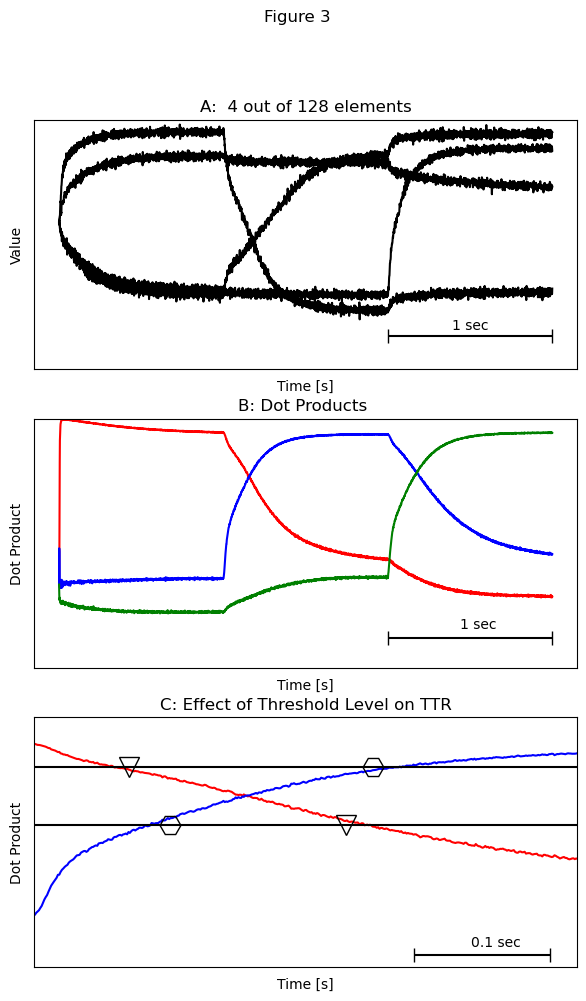

In [33]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
import matplotlib.transforms as tfrms
import matplotlib.offsetbox
from matplotlib.lines import Line2D
# with and without seed
import numpy as np
import random
import pickle
import time
from nengo.utils.matplotlib import rasterplot
xmin = 0
xmax = 3
timestr = time.strftime("%Y%m%d-%H%M%S")
d = 128  # the dimensionality of the vectors
# note dimension
bit_slow_delay = 0.004
slow_delay = 0.008
very_slow_delay = 0.017
extremely_slow_delay = 0.035
time_interval = 1.0
time_interval = float(time_interval)
wait =  0.0
feedback_synapse = 0.1
feedback = 0.99
percent_base = 1.0
percent_bit_slow = 0.0
percent_slow = 0.0
percent_very_slow = 0.0
percent_extremely_slow = 0.0


with spa.Network(seed = 1) as model:
        
        timer = time_interval + wait
        vocab = spa.Vocabulary(d)
        vocab.populate('BLUE; RED; GREEN')
        GREEN = vocab.parse('GREEN')
        RED = vocab.parse('RED')
        BLUE = vocab.parse('BLUE')

    #make it feedback[0] as loop is out
        Color = spa.State(vocab, subdimensions = 1, seed = 1, feedback = feedback, represent_cc_identity = False)
        Color_slow = spa.State(vocab, feedback = feedback, represent_cc_identity = False)

        

        
        def input_very_slow(t):
                if t < time_interval + very_slow_delay:
                    return BLUE
                elif t < timer + very_slow_delay:
                    return '0'
                elif t < timer + time_interval + very_slow_delay:
                    return RED
                elif t < 2 * timer + very_slow_delay:
                    return '0'
                elif t < 2 * timer + time_interval + very_slow_delay:
                    return GREEN
                elif t < 3 * timer + very_slow_delay:
                    return '0'
                else:
                    return '0'
        def input_slow(t):
                if t < time_interval + slow_delay:
                    return BLUE
                elif t < timer + slow_delay:
                    return '0'
                elif t < timer + time_interval + slow_delay:
                    return RED
                elif t < 2 * timer + slow_delay:
                    return '0'
                elif t < 2 * timer + time_interval + slow_delay:
                    return GREEN
                elif t < 3 * timer + slow_delay:
                    return '0'
                else:
                    return '0'
        def input_bit_slow(t):
                if t < time_interval + bit_slow_delay:
                    return BLUE
                elif t < timer + bit_slow_delay:
                    return '0'
                elif t < timer + time_interval + bit_slow_delay:
                    return RED
                elif t < 2 * timer + bit_slow_delay:
                    return '0'
                elif t < 2 * timer + time_interval + bit_slow_delay:
                    return GREEN
                elif t < 3 * timer + bit_slow_delay:
                    return '0'
                else:
                    return '0'

        def input_extremely_slow(t):
                if t < time_interval + extremely_slow_delay:
                    return BLUE
                elif t < timer + extremely_slow_delay:
                    return '0'
                elif t < timer + time_interval + extremely_slow_delay:
                    return RED
                elif t < 2 * timer + extremely_slow_delay:
                    return '0'
                elif t < 2 * timer + time_interval + extremely_slow_delay:
                    return GREEN
                elif t < 3 * timer + extremely_slow_delay:
                    return '0'
                else:
                    return '0'
        def input(t):
                if t < time_interval:
                    return BLUE
                elif t < timer:
                    return '0'
                elif t < timer + time_interval:
                    return RED
                elif t < 2 * timer:
                    return '0'
                elif t < 2 * timer + time_interval:
                    return GREEN
                elif t < 3 * timer:
                    return '0'
                else:
                    return '0'
        input_transcode = spa.Transcode(input, output_vocab = vocab)
        input_transcode >> Color
        input_extremely_slow_transcode = spa.Transcode(input_extremely_slow, output_vocab = vocab)
        input_slow_transcode = spa.Transcode(input_slow, output_vocab = vocab)
        input_very_slow_transcode = spa.Transcode(input_very_slow, output_vocab = vocab)
        input_bit_slow_transcode = spa.Transcode(input_bit_slow, output_vocab = vocab)
        percent_base* input_transcode + percent_slow * input_slow_transcode + \
          percent_bit_slow * input_bit_slow_transcode + \
          percent_very_slow * input_very_slow_transcode + \
          percent_extremely_slow * input_extremely_slow_transcode >> Color_slow 
          
        probe_Color = nengo.Probe(Color.output, synapse = 0.01) 
        probe_Color_slow = nengo.Probe(Color_slow.output, synapse = 0.01) 
         
    #Probe for model outputs as new spikes    
        new_spikes_0 = nengo.Probe(Color.all_ensembles[0].neurons, 'output', seed = 1, synapse = 0.01)
        new_spikes_1 = nengo.Probe(Color.all_ensembles[1].neurons, 'output', synapse = 0.01)
        new_spikes_2 = nengo.Probe(Color.all_ensembles[2].neurons, 'output', synapse = 0.01)
        new_spikes_3 = nengo.Probe(Color.all_ensembles[3].neurons, 'output', synapse = 0.01)
        new_spikes_4 = nengo.Probe(Color.all_ensembles[4].neurons, 'output', synapse = 0.01)
        new_spikes_5 = nengo.Probe(Color.all_ensembles[5].neurons, 'output', synapse = 0.01)
        
        with nengo.Simulator(model) as sim:  # Create the simulator
               
               
            sim.run(timer * 3)  
       
    #Dot Products
        numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
        numbers_slow  = spa.similarity(sim.data[probe_Color_slow], vocab, normalize = True)
                
        numbers_array = np.asarray(numbers)   
        numbers_slow_array = np.asarray(numbers_slow)   
        
        
        pickle.dump(numbers, open("data_Ja18_fb1_0pause", "wb"))
        graph_Ja17 = pickle.load(open("data_Ja18_fb1_0pause", "rb"))        

        #Plot the outputs 
        
        fig, axs = plt.subplots(3, figsize=(7,11))
        fig.suptitle('Figure 3')
        axs[0].plot(figsize = [6, 3.5])
        axs[0].plot(sim.trange(),sim.data[probe_Color][:,127], color='black')
        axs[0].plot(sim.trange(),sim.data[probe_Color][:,0], color='black')
        axs[0].plot(sim.trange(),sim.data[probe_Color][:,10], color='black')
        axs[0].plot(sim.trange(),sim.data[probe_Color][:,20], color='black')
        axs[0].set_title("A:  4 out of 128 elements" )
        axs[0].set_xlabel('Time [s]')
        axs[0].set_ylabel("Value")
        ax = fig.gca()
        axs[0].set_xticks([])   # disable tick
        axs[0].set_yticks([])
        axs[0].set_ylim([-0.5, 0.35])
        trans = tfrms.blended_transform_factory( ax.transData, ax.transAxes )
        axs[0].errorbar( 2.5, -0.39, xerr=0.5, color='k', capsize=5 )
        axs[0].text( 2.5, -0.33, '1 sec', horizontalalignment='center', verticalalignment='top')
        #plt.savefig('Figure3a_S_JL29.png')
        
        #Plot dot product
        
        axs[1].plot(figsize = [6, 3.5])
        axs[1].plot(sim.trange(), numbers[:,0], label = 'red', color='red')
        axs[1].plot(sim.trange(), numbers[:,1], label = 'blue', color='blue')
        axs[1].plot(sim.trange(), numbers[:,2], label = 'green', color='green')
        axs[1].set_xlabel ("Time [s]")
        axs[1].set_ylabel("Dot Product")
        axs[1].set_xticks([])    # disable tick
        axs[1].set_yticks([])
        axs[1].set_ylim([-0.5, 1])
        axs[1].errorbar( 2.5, -0.32, xerr=0.5, color='k', capsize=5)
        axs[1].text( 2.55, -0.2, '1 sec',  horizontalalignment='center', verticalalignment='top')
        axs[1].set_title('B: Dot Products ')

        #Plot Part C
        #Generate Plots
        x3_line = np.linspace(0, 3, 3000)
        axs[2].plot(figsize = (6, 3.5))
        xmin, xmax = 1, 1.4
        ymin, ymax = 0.4, 1.2
        plt.plot(x3_line, numbers_array[:,0], 'red' )
        plt.plot(x3_line, numbers_array[:,1], 'blue')

        L_pt1 = [0,0.8]
        R_pt1 = [10,0.8]
        x1_line = L_pt1[0], R_pt1[0]
        y1_line = L_pt1[1], R_pt1[1]
        plt.plot(x1_line, y1_line, color = 'Black')

        L_pt2 = [0,0.5]
        R_pt2 = [10,0.5]
        x2_line = L_pt2[0], R_pt2[0]
        y2_line = L_pt2[1], R_pt2[1]
        plt.plot(x2_line, y2_line, color = 'Black')

        axs[2].set_xlabel ("Time [s]")
        axs[2].set_ylabel("Dot Product")
        plt.xlim(xmin, xmax)
        axs[2].set_yticks([])
        axs[2].set_xticks([])
        bb=np.array([1])
        axs[2].errorbar( 1.33, -0.17, xerr=0.05, color='k', capsize=5)
        axs[2].text( 1.34, -0.07, '0.1 sec',  horizontalalignment='center', verticalalignment='top')
        
        bb=np.array([1])
        plt.plot(bb * 1.25,bb * 0.8,marker="H", fillstyle='none', markersize=15, linewidth=0, color='black')
        plt.plot(bb * 1.07,bb * 0.80,marker="v", fillstyle='none', markersize=15, linewidth=0, color='black')
        plt.plot(bb * 1.23,bb * 0.5,marker="v", fillstyle='none', markersize=15, linewidth=0, color='black')
        plt.plot(bb * 1.1,bb * 0.5,marker="H", fillstyle='none', markersize=15, linewidth=0, color='black')
         
        plt.title('C: Effect of Threshold Level on TTR')
        fig.savefig('Figure4.png') 
        fig.savefig('Figure4.svg') 
           
        